In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 7.2

In [2]:
with open('sunspots.txt') as f:
    lines = f.readlines()
months = []
sunspots = []
for line in lines:
    month, spot = line.split()
    months.append(int(month))
    sunspots.append(float(spot))

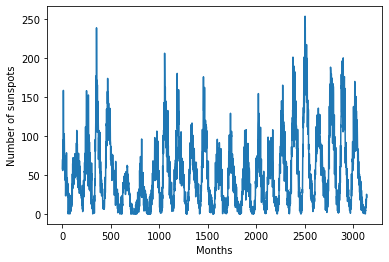

In [ ]:
plt.plot(months, sunspots)

plt.xlabel('Months')
plt.ylabel('Number of sunspots')

plt.savefig('HW3_figures/sunspots.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Estimate the period. There are 24 peaks in the data
len(months)/24


0.007633587786259542


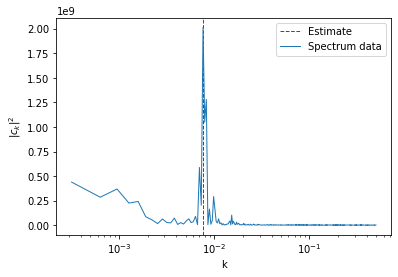

In [ ]:
y = np.asarray(sunspots)
N = y.size

Y = np.fft.fft(y)
freq_month = np.fft.fftfreq(N)

plt.figure()
plt.axvline(0.0076, color='red', linestyle='--', linewidth=1, label='Estimate')
plt.plot(freq_month[freq_month > 0], np.abs(Y[freq_month > 0])**2, '-', lw=1, label='Spectrum data')
plt.xlabel('k')
plt.ylabel(r'$|c_k|^2$')
plt.xscale('log')
plt.legend()

plt.savefig('HW3_figures/sunspot_spectrum.png', dpi=300, bbox_inches='tight')

plt.show()

# 7.4

In [28]:
dow = np.loadtxt('dow.txt')

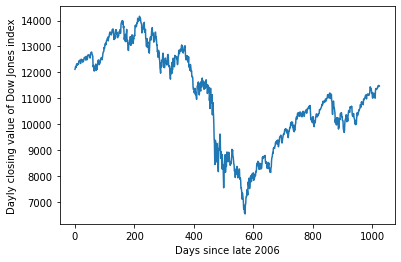

In [ ]:
plt.plot(dow)
plt.xlabel('Days since late 2006')
plt.ylabel('Dayly closing value of Dow Jones index')

plt.savefig('HW3_figures/dow.png', dpi=300, bbox_inches='tight')
plt.show()

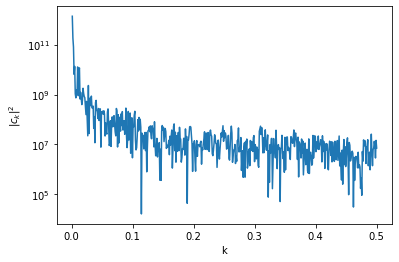

In [ ]:
Y = np.fft.rfft(dow)
freq_day = np.fft.rfftfreq(dow.size)

plt.figure()
plt.plot(freq_day[freq_day > 0], np.abs(Y[freq_day > 0])**2)
plt.xlabel('k')
plt.yscale('log')
plt.ylabel(r'$|c_k|^2$')

plt.savefig('HW3_figures/dow_spectrum.png', dpi=300, bbox_inches='tight')
plt.show()

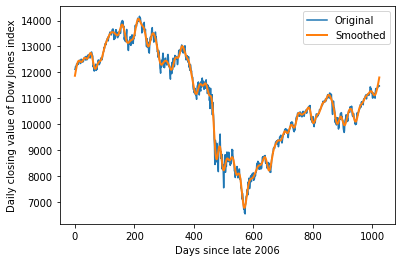

In [ ]:
Y2 = Y.copy()
Y2[int(len(Y2)*0.1):] = 0
dow_smooth = np.fft.irfft(Y2)
plt.plot(dow, label='Original')
plt.plot(dow_smooth, label='Smoothed', linewidth=2)
plt.legend()
plt.xlabel('Days since late 2006')  
plt.ylabel('Daily closing value of Dow Jones index')

plt.savefig('HW3_figures/dow_smooth.png', dpi=300, bbox_inches='tight')

plt.show()

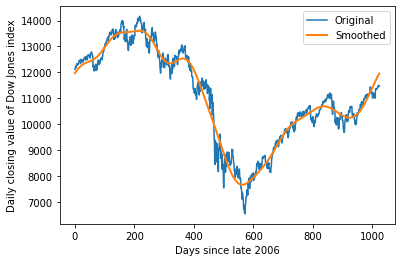

In [ ]:
Y3 = Y.copy()
Y3[int(len(Y3)*0.02):] = 0
dow_smooth = np.fft.irfft(Y3)
plt.plot(dow, label='Original')
plt.plot(dow_smooth, label='Smoothed', linewidth=2)
plt.legend()
plt.xlabel('Days since late 2006')  
plt.ylabel('Daily closing value of Dow Jones index')

plt.savefig('HW3_figures/dow_smooth2.png', dpi=300, bbox_inches='tight')

plt.show()

# 7.9

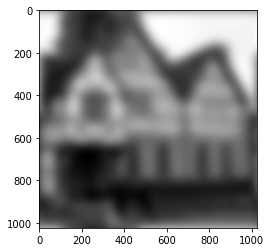

In [ ]:
blur = np.loadtxt('blur.txt')
blur_array = np.asarray(blur)
plt.imshow(blur_array, cmap='gray')

plt.savefig('HW3_figures/image.png', dpi=300, bbox_inches='tight')

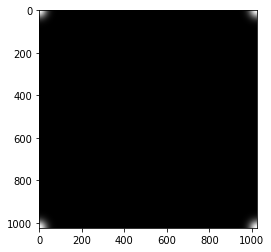

In [ ]:
def gaussian(x, y, sigma):
    return np.exp(-(x**2 + y**2)/(2*sigma**2))

size_x, size_y = blur_array.shape
xs = np.linspace(0, size_x/2, size_x//2)
xs = np.append(xs, xs - size_x/2)
X, Y = np.meshgrid(-xs, -xs)

point_spread = gaussian(X, Y, sigma=25)
plt.imshow(point_spread, cmap='gray')

plt.savefig('HW3_figures/point_spread_function.png', dpi=300, bbox_inches='tight')

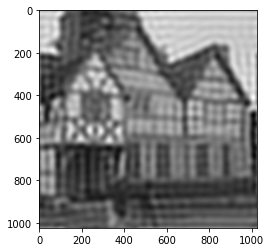

In [ ]:
im = np.fft.rfft2(blur_array)
psf = np.fft.rfft2(point_spread, s=blur_array.shape)

eps = 1e-3 * np.max(np.abs(psf))
psf[np.abs(psf) < eps] = eps

im_sharp = np.fft.irfft2(im / psf)
plt.imshow(im_sharp, cmap='gray')

plt.savefig('HW3_figures/deconvoluted_image.png', dpi=300, bbox_inches='tight')